In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# بارگیری داده‌های sunspots
data = sm.datasets.sunspots.load_pandas().data
t = data['YEAR'].values
y = data['SUNACTIVITY'].values

In [4]:
# نرمال‌سازی زمان
T = t.max() - t.min()
t_norm = (t - t.min()) / T

In [5]:
# تعداد جملات سری فوریه
N = 10

In [6]:
# ساخت ماتریس طراحی سری فوریه
X_terms = []
for k in range(1, N + 1):
    X_terms.append(np.cos(2 * np.pi * k * t_norm))
    X_terms.append(np.sin(2 * np.pi * k * t_norm))
X = np.column_stack(X_terms)
X = np.column_stack([np.ones_like(t_norm), X])  # جمله ثابت

In [7]:
# برازش مدل
coeffs, *_ = np.linalg.lstsq(X, y, rcond=None)
y_fit = X.dot(coeffs)

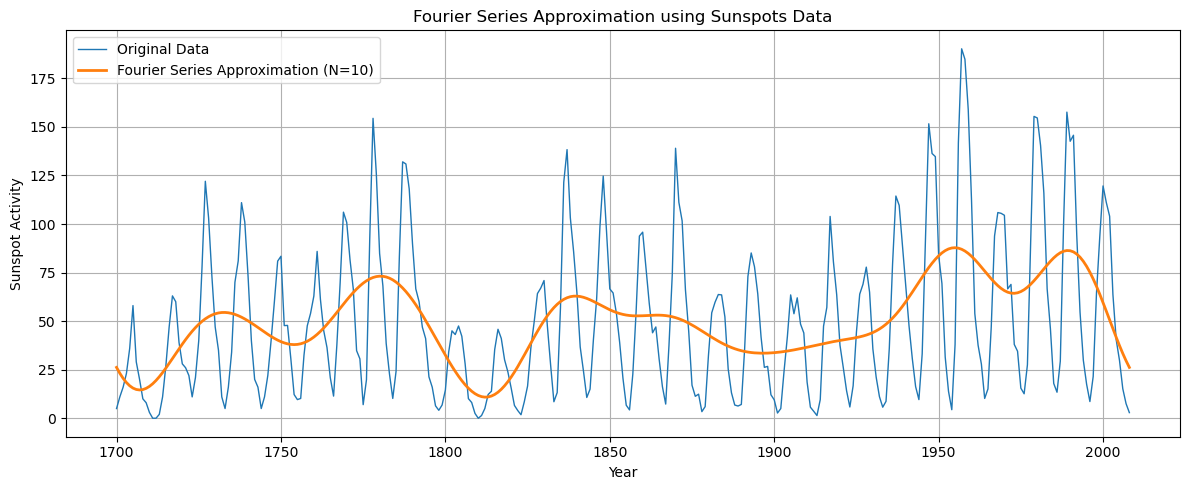

In [9]:
# رسم نمودار
plt.figure(figsize=(12, 5))
plt.plot(t, y, label='Original Data', linewidth=1)
plt.plot(t, y_fit, label=f'Fourier Series Approximation (N={N})', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Fourier Series Approximation using Sunspots Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()